In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge

import multiprocessing
import random
from itertools import product

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_val_score


from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [3]:
# SE CREA UNA FUNCION PARA ELIMINAR LAS COLUMNAS DE FORMA FACIL 
def eliminar_columna(nombre_columna):
    datos.drop(nombre_columna, axis=1, inplace=True) #se edita df principal

In [4]:
start = time.time()

In [5]:
# SE LE ASIGNA EL NOMBRE DEL ARCHIVO CSV A UNA VARIABLE LLAMADA "ARCHIVO"
archivo='ALUMNOS-trainData.csv'

In [6]:
# SE LEE EL ARCHIVO CSV Y SE GUARDA EN LA VARIABLE DATOS
datos=pd.read_csv(archivo)

In [7]:
# SE IMPRIMEN LOS PRIMEROS 3 DATOS PARA VER QUE SE ENCUENTREN LAS VARIABLES Y DATOS
datos.head(3)

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79


In [8]:
#SE BINARIZA EL NOSHOW CON LAS CONDICIONES DADAS EN EL ENUNCIADO DEL INFORME 
datos['noshow_b'] = np.where(datos['noshow'] >= 4, 1,0)

In [9]:
#elimino primera columna ya que no se conoce su significado
datos.drop(columns=datos.columns[0], axis=1, inplace=True)

In [12]:
# SE ELIMINAN LAS VARIABLES CATEGORICAS Y QUE NO TENGAN RELACION CON EL PROBLEMA, ADEMAS DEL NOSHOW SIN
eliminar=['fligth_number','out_of_stock','date','departure_time','noshow','origin','destination']
for i in eliminar:
    eliminar_columna(i)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999890 entries, 0 to 999889
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   distance         999890 non-null  int64  
 1   denied_boarding  999890 non-null  int64  
 2   pax_midlow       999890 non-null  int64  
 3   pax_high         999890 non-null  int64  
 4   pax_midhigh      999890 non-null  int64  
 5   pax_low          999890 non-null  int64  
 6   pax_freqflyer    999890 non-null  int64  
 7   group_bookings   999890 non-null  int64  
 8   dom_cnx          999890 non-null  int64  
 9   int_cnx          999890 non-null  int64  
 10  p2p              999890 non-null  int64  
 11  capacity         999890 non-null  float64
 12  revenues_usd     999890 non-null  float64
 13  bookings         999890 non-null  int64  
 14  noshow_b         999890 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 114.4 MB


In [13]:
# SE POSICIONA LA COLUMNA NOSHOW_B EN LA PRIMERA POSICION 
first_column = datos.pop('noshow_b')
datos.insert(0,'noshow_b',first_column)
datos

,noshow_b,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,1,1394,0,94,2,28,94,22,19,1,0,239,174.0,10631.1,240
1,0,489,0,100,4,4,87,25,0,19,9,192,174.0,5453.7,220
2,1,2180,0,7,1,5,64,2,0,0,10,69,218.0,16161.0,79
3,1,524,0,54,4,7,21,4,0,26,0,64,174.0,10828.7,90
4,1,1170,0,21,88,18,82,0,88,23,3,183,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,1,552,0,25,12,20,4,12,0,64,9,0,144.0,14102.1,73
999886,1,3934,0,129,3,19,121,2,20,0,118,156,168.0,32907.8,274
999887,1,1430,0,2,1,0,108,20,36,7,0,124,218.0,13519.3,131
999888,0,1091,0,67,2,7,42,16,0,34,2,98,144.0,8729.6,134


In [14]:
#se revisa que los datos no tengan na y no existan datos que se repitan
print(datos.shape)
print(datos.isna().sum())
print("Numeros de datos duplicado:",datos.duplicated().sum())

#se encuntra un dato elimando y se procede
datos = datos.drop_duplicates()
print("Numero de datos duplicados:",datos.duplicated().sum())
print(datos.shape)

(999890, 15)
noshow_b           0
distance           0
denied_boarding    0
pax_midlow         0
pax_high           0
pax_midhigh        0
pax_low            0
pax_freqflyer      0
group_bookings     0
dom_cnx            0
int_cnx            0
p2p                0
capacity           0
revenues_usd       0
bookings           0
dtype: int64
Numeros de datos duplicado: 2
Numero de datos duplicados: 0
(999888, 15)


In [17]:
#Entrena el modelo PCA con escalado de los datos

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline 
#Entrena el modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(),PCA(n_components=2))
pca_pipe.fit(datos)

#se extrae el modelo entrenado del pipelie
modelo_pca = pca_pipe.named_steps['pca']

In [18]:
# Proyección de las observaciones de entrenamiento

proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2
0,1.458605,-1.547958
1,0.626249,-1.604827
2,-0.813793,0.509580
3,-1.706751,0.418676
4,0.736977,2.885290


In [22]:
 # SE CREA UN DATAFRAME CON LOS 2 COMPOENTES A GARFICAR "PC1 Y PC2"

pd.DataFrame(
    data = modelo_pca.components_,
    columns = datos.columns,
    index = ['PC1','PC2']
)

,noshow_b,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
PC1,0.044704,0.357270,0.005153,0.370790,0.046003,0.020502,0.265179,0.161413,0.077332,-0.099494,0.312360,0.289423,0.349799,0.360251,0.429633
PC2,-0.130305,0.296971,0.013764,-0.120944,0.281396,0.226804,-0.440114,0.055507,0.097578,-0.035394,0.339624,-0.472197,0.085099,0.365799,-0.249934


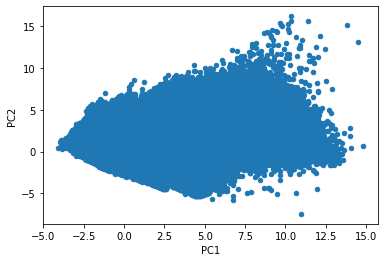

In [23]:
# SE  GRAFICAN LOS DATOS EN 2 COMPONENTES

proyecciones.plot(x ='PC1', y='PC2', kind = 'scatter')

In [24]:
# SE DESPLIEGA INFORMACION SOBRE LAS COMPONENTES GRAFICADAS

proyecciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999888 entries, 0 to 999889
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     999888 non-null  float64
 1   PC2     999888 non-null  float64
dtypes: float64(2)
memory usage: 22.9 MB


In [25]:
#SE REALIZA UNA COPIA DE LOS DATOS EN LA VARIABLE DATOS2
datos2 = datos

In [26]:
# SE EXTRAE LA COLUMNA CORRESPONDIENTE A LOS NOSHOW_B
datos2.iloc[:,0]

0         1
1         0
2         1
3         1
4         1
         ..
999885    1
999886    1
999887    1
999888    0
999889    1
Name: noshow_b, Length: 999888, dtype: int64

In [27]:
# SE VERIFICA QUE LA COLUMNA NO TENGA VALORES VACIOS 
datos2.iloc[:,0].isna().sum()

0

In [28]:
# SE VERIFICA LAS DEMAS VARIABLES DEL DATAFRAME ESTEN CORRECTAS Y NO HAYAN SUFRIDO MODIFICACIONES
datos2.iloc[:,1:]

,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,1394,0,94,2,28,94,22,19,1,0,239,174.0,10631.1,240
1,489,0,100,4,4,87,25,0,19,9,192,174.0,5453.7,220
2,2180,0,7,1,5,64,2,0,0,10,69,218.0,16161.0,79
3,524,0,54,4,7,21,4,0,26,0,64,174.0,10828.7,90
4,1170,0,21,88,18,82,0,88,23,3,183,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,552,0,25,12,20,4,12,0,64,9,0,144.0,14102.1,73
999886,3934,0,129,3,19,121,2,20,0,118,156,168.0,32907.8,274
999887,1430,0,2,1,0,108,20,36,7,0,124,218.0,13519.3,131
999888,1091,0,67,2,7,42,16,0,34,2,98,144.0,8729.6,134


In [29]:
# SE DESPLIEGAN LOS INDEX DE LOS DATOS CON EL FIN DE SABER CUANTOS DATOS TENEMOS EN TODO EL DATAFRAME
datos2.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            999880, 999881, 999882, 999883, 999884, 999885, 999886, 999887,
            999888, 999889],
           dtype='int64', length=999888)

In [30]:
# SE DESPLIEGAN EL CONTENIDO DEL DATAFRAME DE TODO MENOS LA VARIABLE NOSHOW_B
datos2.iloc[:,1:]

,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,1394,0,94,2,28,94,22,19,1,0,239,174.0,10631.1,240
1,489,0,100,4,4,87,25,0,19,9,192,174.0,5453.7,220
2,2180,0,7,1,5,64,2,0,0,10,69,218.0,16161.0,79
3,524,0,54,4,7,21,4,0,26,0,64,174.0,10828.7,90
4,1170,0,21,88,18,82,0,88,23,3,183,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,552,0,25,12,20,4,12,0,64,9,0,144.0,14102.1,73
999886,3934,0,129,3,19,121,2,20,0,118,156,168.0,32907.8,274
999887,1430,0,2,1,0,108,20,36,7,0,124,218.0,13519.3,131
999888,1091,0,67,2,7,42,16,0,34,2,98,144.0,8729.6,134


In [31]:
# SE ESTANDARIZAN LOS DATOS DEL DATAFRAME QUE CONTIENE TODAS LAS COLUMNAS, MENOS NOSHOW_B YA QUE NO SE TIENE QUE ESTANDARIZAR
scaler = StandardScaler()
scaler.fit(datos2.iloc[:,1:])
Data = scaler.transform(datos2.iloc[:,1:])


In [32]:
# SE VERIFICA QUE DATA CORRESPONDE A UN ARRAY ESTANDARIZADO
Data

array([[-0.03965962, -0.08692515,  0.41483214, ..., -0.12408449,
        -0.234039  ,  1.17102264],
       [-0.57690293, -0.08692515,  0.54945867, ..., -0.12408449,
        -0.52226938,  0.87959468],
       [ 0.42694064, -0.08692515, -1.53725261, ...,  1.22169471,
         0.07381536, -1.17497239],
       ...,
       [-0.01828862, -0.08692515, -1.64944139, ...,  1.22169471,
        -0.07325039, -0.41725971],
       [-0.21953224, -0.08692515, -0.19098727, ..., -1.04166121,
        -0.33989717, -0.37354552],
       [-0.69919256, -0.08692515, -0.07879849, ..., -1.04166121,
        -0.65714321, -0.4755453 ]])

In [33]:
# YA QUE Data ERA UNA MATRIZ TIPO NUMPY, SE TRANSFORMA A TIPO PANDAS PARA MAS COMODIDAS
newData= pd.DataFrame(Data)

In [34]:
# SE VERIFICA QUE LA MATRIZ HAYA QUEDADO EN ORDEN
newData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.039660,-0.086925,0.414832,-0.249309,2.111976,0.958500,0.375831,1.233680,-0.770005,-0.607501,2.013224,-0.124084,-0.234039,1.171023
1,-0.576903,-0.086925,0.549459,0.026503,-0.225930,0.776193,0.592649,-0.311325,-0.212104,-0.402762,1.295919,-0.124084,-0.522269,0.879595
2,0.426941,-0.086925,-1.537253,-0.387215,-0.128517,0.177184,-1.069629,-0.311325,-0.801000,-0.380014,-0.581284,1.221695,0.073815,-1.174972
3,-0.556126,-0.086925,-0.482678,0.026503,0.066308,-0.942702,-0.925083,-0.311325,0.004858,-0.607501,-0.657593,-0.124084,-0.223038,-1.014687
4,-0.172635,-0.086925,-1.223124,11.610604,1.137848,0.645974,-1.214175,6.844486,-0.088125,-0.539255,1.158563,-1.041661,0.105024,0.719309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999883,-0.539504,-0.086925,-1.133373,1.129751,1.332674,-1.385447,-0.346899,-0.311325,1.182651,-0.402762,-1.634349,-1.041661,-0.040805,-1.262401
999884,1.468183,-0.086925,1.200154,-0.111403,1.235261,1.661685,-1.069629,1.314996,-0.801000,2.076852,0.746494,-0.307600,1.006124,1.666450
999885,-0.018289,-0.086925,-1.649441,-0.387215,-0.615581,1.323114,0.231285,2.616053,-0.584038,-0.607501,0.258116,1.221695,-0.073250,-0.417260
999886,-0.219532,-0.086925,-0.190987,-0.249309,0.066308,-0.395780,-0.057807,-0.311325,0.252814,-0.562004,-0.138691,-1.041661,-0.339897,-0.373546


In [35]:
# SE VERIFICAN NUEVAMENTE LA COLUMNA DE NOSHOW_B ANTES DE JUNTARLAS AL DATAFRAME ESTANDARIZADO
datos2.iloc[:,0]

0         1
1         0
2         1
3         1
4         1
         ..
999885    1
999886    1
999887    1
999888    0
999889    1
Name: noshow_b, Length: 999888, dtype: int64

In [36]:
# SE JUNTA EL DATAFRAME DE DATA Y LAS COLUMNAS NO ESTANDARIZADAS 
newData["noshow_b"]=datos2.iloc[:,0]

In [37]:
# SE VERIFICA QUE LA COLUMNA AÑADIDA HAYA QUEDADO EN ORDEN
newData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,noshow_b
0,-0.039660,-0.086925,0.414832,-0.249309,2.111976,0.958500,0.375831,1.233680,-0.770005,-0.607501,2.013224,-0.124084,-0.234039,1.171023,1.0
1,-0.576903,-0.086925,0.549459,0.026503,-0.225930,0.776193,0.592649,-0.311325,-0.212104,-0.402762,1.295919,-0.124084,-0.522269,0.879595,0.0
2,0.426941,-0.086925,-1.537253,-0.387215,-0.128517,0.177184,-1.069629,-0.311325,-0.801000,-0.380014,-0.581284,1.221695,0.073815,-1.174972,1.0
3,-0.556126,-0.086925,-0.482678,0.026503,0.066308,-0.942702,-0.925083,-0.311325,0.004858,-0.607501,-0.657593,-0.124084,-0.223038,-1.014687,1.0
4,-0.172635,-0.086925,-1.223124,11.610604,1.137848,0.645974,-1.214175,6.844486,-0.088125,-0.539255,1.158563,-1.041661,0.105024,0.719309,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999883,-0.539504,-0.086925,-1.133373,1.129751,1.332674,-1.385447,-0.346899,-0.311325,1.182651,-0.402762,-1.634349,-1.041661,-0.040805,-1.262401,1.0
999884,1.468183,-0.086925,1.200154,-0.111403,1.235261,1.661685,-1.069629,1.314996,-0.801000,2.076852,0.746494,-0.307600,1.006124,1.666450,0.0
999885,-0.018289,-0.086925,-1.649441,-0.387215,-0.615581,1.323114,0.231285,2.616053,-0.584038,-0.607501,0.258116,1.221695,-0.073250,-0.417260,1.0
999886,-0.219532,-0.086925,-0.190987,-0.249309,0.066308,-0.395780,-0.057807,-0.311325,0.252814,-0.562004,-0.138691,-1.041661,-0.339897,-0.373546,1.0


In [38]:
# SE VERIFICA QUE NO HAYAN DATOS VACIOS LUEGO DE JUNTAR LOS DATAFRAMES
print(newData.isna())

            0      1      2      3      4      5      6      7      8      9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
999883  False  False  False  False  False  False  False  False  False  False   
999884  False  False  False  False  False  False  False  False  False  False   
999885  False  False  False  False  False  False  False  False  False  False   
999886  False  False  False  False  False  False  False  False  False  False   
999887  False  False  False  False  False  False  False  False  False  False   

           10     11     12     13  nos

In [39]:
# SE ENCUENTRAN 2 DATOS VACIOS, QUE NOS PUEDEN GENERAR PROBLEMAS 
newData.noshow_b.isna().sum()

2

In [40]:
# SE BORRAN LAS FILAS CORRESPONDIENTES A LOS DATOS VACIOS ENCONTRADOS ANTERIORMENTE
newData.dropna(subset=['noshow_b'],inplace=True)

In [41]:
# SE VERIFICA QUE TODO ESTE EN ORDEN
newData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,noshow_b
0,-0.039660,-0.086925,0.414832,-0.249309,2.111976,0.958500,0.375831,1.233680,-0.770005,-0.607501,2.013224,-0.124084,-0.234039,1.171023,1.0
1,-0.576903,-0.086925,0.549459,0.026503,-0.225930,0.776193,0.592649,-0.311325,-0.212104,-0.402762,1.295919,-0.124084,-0.522269,0.879595,0.0
2,0.426941,-0.086925,-1.537253,-0.387215,-0.128517,0.177184,-1.069629,-0.311325,-0.801000,-0.380014,-0.581284,1.221695,0.073815,-1.174972,1.0
3,-0.556126,-0.086925,-0.482678,0.026503,0.066308,-0.942702,-0.925083,-0.311325,0.004858,-0.607501,-0.657593,-0.124084,-0.223038,-1.014687,1.0
4,-0.172635,-0.086925,-1.223124,11.610604,1.137848,0.645974,-1.214175,6.844486,-0.088125,-0.539255,1.158563,-1.041661,0.105024,0.719309,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999883,-0.539504,-0.086925,-1.133373,1.129751,1.332674,-1.385447,-0.346899,-0.311325,1.182651,-0.402762,-1.634349,-1.041661,-0.040805,-1.262401,1.0
999884,1.468183,-0.086925,1.200154,-0.111403,1.235261,1.661685,-1.069629,1.314996,-0.801000,2.076852,0.746494,-0.307600,1.006124,1.666450,0.0
999885,-0.018289,-0.086925,-1.649441,-0.387215,-0.615581,1.323114,0.231285,2.616053,-0.584038,-0.607501,0.258116,1.221695,-0.073250,-0.417260,1.0
999886,-0.219532,-0.086925,-0.190987,-0.249309,0.066308,-0.395780,-0.057807,-0.311325,0.252814,-0.562004,-0.138691,-1.041661,-0.339897,-0.373546,1.0


In [42]:
# SEPARO MI COLUMNA NOSHOW_B Y SE LA ASIGNO A MI VARIABLE DATA_LABELS
data_labels=newData.noshow_b

In [43]:
# SE BORRA LA COLUMNA NOSHOW_B DEL DATAFRAME 
newData=newData.iloc[:,:-1]

In [44]:
# SE VERIFICA QUE NO ESTE LA COLUMNA NOSHOW_B
newData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.039660,-0.086925,0.414832,-0.249309,2.111976,0.958500,0.375831,1.233680,-0.770005,-0.607501,2.013224,-0.124084,-0.234039,1.171023
1,-0.576903,-0.086925,0.549459,0.026503,-0.225930,0.776193,0.592649,-0.311325,-0.212104,-0.402762,1.295919,-0.124084,-0.522269,0.879595
2,0.426941,-0.086925,-1.537253,-0.387215,-0.128517,0.177184,-1.069629,-0.311325,-0.801000,-0.380014,-0.581284,1.221695,0.073815,-1.174972
3,-0.556126,-0.086925,-0.482678,0.026503,0.066308,-0.942702,-0.925083,-0.311325,0.004858,-0.607501,-0.657593,-0.124084,-0.223038,-1.014687
4,-0.172635,-0.086925,-1.223124,11.610604,1.137848,0.645974,-1.214175,6.844486,-0.088125,-0.539255,1.158563,-1.041661,0.105024,0.719309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999883,-0.539504,-0.086925,-1.133373,1.129751,1.332674,-1.385447,-0.346899,-0.311325,1.182651,-0.402762,-1.634349,-1.041661,-0.040805,-1.262401
999884,1.468183,-0.086925,1.200154,-0.111403,1.235261,1.661685,-1.069629,1.314996,-0.801000,2.076852,0.746494,-0.307600,1.006124,1.666450
999885,-0.018289,-0.086925,-1.649441,-0.387215,-0.615581,1.323114,0.231285,2.616053,-0.584038,-0.607501,0.258116,1.221695,-0.073250,-0.417260
999886,-0.219532,-0.086925,-0.190987,-0.249309,0.066308,-0.395780,-0.057807,-0.311325,0.252814,-0.562004,-0.138691,-1.041661,-0.339897,-0.373546


In [45]:
# SE EMPIEZA CON EL DESARROLLO DE LOS MODELOS NAIVE BAYES------------------------- (RODRIGO HIDALGO JIMENEZ)---------------------------------------------------------
#Creando un objeto Naive Bayes con las condiciones iniciales

from sklearn.naive_bayes import GaussianNB # se importa la libreria para trabajar con gaussianNB
from os import error
from sklearn.model_selection import KFold
from sklearn import metrics as mt

In [46]:
# SE CREA UN ARREGLO CON LOS VALORES DE VAR_SMOOTHING QUE SE PROBARAN PARA APLICAR EL MODELO NAIVE BAYES
k=[5,4,3,2,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001,0.0000005,0.0000001,0.00000005,0.00000001,0.000000005,0.000000001,0.0000000005,0.0000000001] # diversos valores de mi parametro
j=len(k)
print("el valor de j es: ",j)



numFolds=30
accTrainModelos = np.zeros((j,1))
stdTrainModelos = np.zeros((j,1))
accTestModelos = np.zeros((j,1))
stdTestModelos = np.zeros((j,1))

for x in range(1,j): # para varias mi parametro 
  
 # SE CREA EL OBJETO K FOLD 
 #Generando los k-fold
    kf = KFold(n_splits=numFolds,shuffle=True)
    temp=kf.split(newData)

    # SE CREA EL OBJETO NAIVE BAYES, CON EL PARAMETRO VAR_SMOOTHING DESEADO
    NB = GaussianNB(var_smoothing= k[x]) 

    # SE CREAN ARREGLOS TEMPORALES PARA GUARDAR LOS VALORES DE TRAIN Y TEST 
    tempValuesTrain = np.zeros((numFolds,1))
    tempValuesTest = np.zeros((numFolds,1))
    i = 0
    for train_index, test_index in temp:#C FOR PARA HACER ENTRENAMIENTO Y TEST CON EL VAR ACTUAL
      #print("TRAIN:", train_index, "\nTEST:", test_index,"\n\n")
  
 # SE EXTRAEN LOS DATOS DE ENTRENAMIENTO Y TEST
      trainData = newData.iloc[train_index,:]
      testData  = newData.iloc[test_index,:]

      trainLabel = data_labels.iloc[train_index]
      testLabel  = data_labels.iloc[test_index]

   # SE ENTRENA EL MODELO CON LOS DATOS DE ENTRENAMIENTO
      NB = NB.fit(trainData, trainLabel)

 # SE APLICA EL MODELO CON EL PARAMETRO ACTUAL, A LOS DATOS DE TRAIN Y TEST
      prediccion_train = NB.predict(trainData)
      prediccion_test=NB.predict(testData)

      # SE GUARDAN LOS F1 SCORE DE LAS PREDICCIONES QUE RESULTAN DEL MODELO QUE SE APLICA 
      tempValuesTrain[i]=mt.f1_score(data_labels.iloc[train_index],prediccion_train,labels=[0,1],pos_label=0,average="binary") 
      tempValuesTest[i]=mt.f1_score(data_labels.iloc[test_index],prediccion_test,labels=[0,1],pos_label=0,average="binary")
      i+=1
    accTrainModelos[x-1] = tempValuesTrain.mean()
    stdTrainModelos[x-1] = tempValuesTrain.std()
    accTestModelos[x-1] = tempValuesTest.mean()
    stdTestModelos[x-1] = tempValuesTest.std()


#CREANDO DATAFRAME PARA GUARDAR LOS DATOS  

tempDF=pd.DataFrame(accTestModelos,columns=["meanTest"])
tempDF['stdTest']=stdTestModelos
tempDF['meanTrain']=accTrainModelos
tempDF['stdTrain']=stdTrainModelos
tempDF['ejeX']=np.arange(1,j+1,1)
tempDF


el valor de j es:  25


,meanTest,stdTest,meanTrain,stdTrain,ejeX
0,0.005994,0.000952,0.006004,0.000269,1
1,0.011395,0.001201,0.011417,0.000218,2
2,0.024011,0.002152,0.024023,0.000288,3
3,0.052741,0.002837,0.052733,0.000389,4
4,0.079400,0.003124,0.079477,0.000541,5
5,0.110514,0.003682,0.110547,0.000550,6
6,0.115145,0.003775,0.115199,0.000683,7
7,0.119212,0.003168,0.119163,0.000677,8
8,0.119733,0.004943,0.119692,0.000747,9
9,0.119962,0.003786,0.120109,0.000618,10


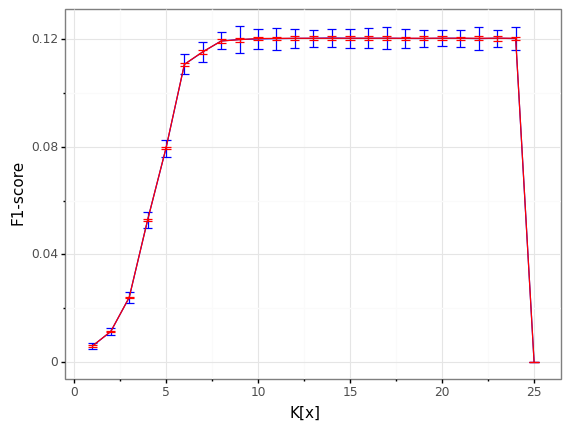

<ggplot: (8731792683889)>

In [47]:
#Gráfico de los valores obtenidos del proceso anterior
from plotnine import *
(ggplot(tempDF)+aes(x="ejeX")+
 geom_line(aes(y="meanTest",ymin="meanTest-stdTest",ymax="meanTest+stdTest"),color="blue")+
 geom_errorbar(aes(y="meanTest",ymin="meanTest-stdTest",ymax="meanTest+stdTest"),color="blue")+ 
 geom_line(aes(y="meanTrain",ymin="meanTrain-stdTrain",ymax="meanTrain+stdTrain"),color="red")+
 geom_errorbar(aes(y="meanTrain",ymin="meanTrain-stdTrain",ymax="meanTrain+stdTrain"),color="red")+ 
 labs(x="K[x]",y="F1-score")+
 theme_bw()
)

In [80]:
#SE EVALUA EL MODELO CON EL PARAMETRO OBTENIDO
ksmoothingfold =k[14] 

X_train, X_test, y_train, y_test = train_test_split(newData,data_labels, train_size=0.70,shuffle= True)

testData=pd.DataFrame(X_test,columns=newData.columns.values)
testData["Labels"]=y_test

In [81]:
NB = GaussianNB(var_smoothing= ksmoothingfold) # se entrena el modelo con suavizado de laplace = 1x10-9 
NB = NB.fit(X_train,y_train) # ENTRENANDO EL MODELO 

In [82]:
#Aplicando el modelo a otros datos (X_test)

resultado=NB.predict(X_test) # desarrollo por medio del modelo, la prediccion basado en x test

Límites [2. 1. 0.]


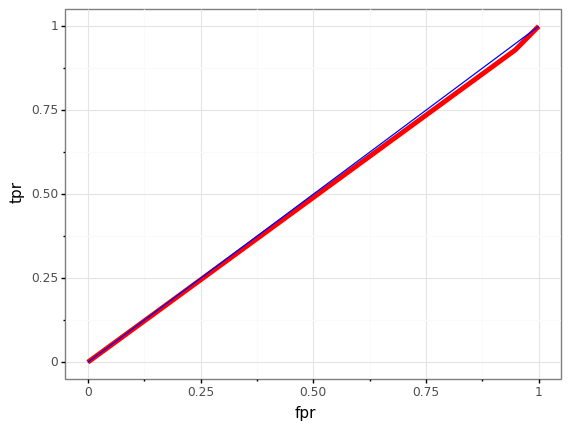

<ggplot: (8731790566141)>
Valor del AUC: 0.490651420685524


In [83]:
# CURVA ROC 

#Calculando los tpr and fpr

fpr, tpr, thresholds = mt.roc_curve(y_test==0,resultado) # se dice que la clase TRUEPOSITIVE ES LA CLASE 0 = menos DE 4 NOSHOWS ( esta bien declararlo aca? porque me sale la curva de entrebnamiento por debajo de recta de test?)

print("Límites",thresholds)

tempDF=pd.DataFrame(zip(fpr,tpr),columns=["fpr","tpr"])
#Curva ROC
print(ggplot(tempDF)+aes(x="fpr",y="tpr")+geom_line(color="red",size=2)+
    annotate("segment",x=0,y=0,xend=1,yend=1,color="blue")+
    theme_bw()
)

#Valor del AUC
print("Valor del AUC:",mt.auc(fpr,tpr))

In [84]:
# CALCULANDO DIVERSOS MEDIDAS DE RENDIMIENTO AUCRRACY, PRESSION, RECALL Y F1-SCORE

print("Accuracy del modelo:",mt.accuracy_score(y_test,resultado)) # SE CALCULA EL ACURRACY DEL MODELO
print("Presición del modelo, para cada clase:",mt.precision_score(y_test,resultado,pos_label=0,average="binary"))
print("Recall del modelo para cada clase:",mt.recall_score(y_test,resultado,labels=[0,1],pos_label=0,average="binary"))
print("F1-score del modelo para cada clase:",mt.f1_score(y_test,resultado,labels=[0,1],pos_label=0,average="binary"))

Accuracy del modelo: 0.6461732329664028
Presición del modelo, para cada clase: 0.41594631483166516
Recall del modelo para cada clase: 0.07088583058732313
F1-score del modelo para cada clase: 0.12112881322248353
